In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from collections import namedtuple
import math

In [206]:
from numba import jit

In [2]:
Point = namedtuple("Point", ['x', 'y','index'])

In [3]:
def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

In [4]:
def get_objective(nodeCount,points,solution):
    # calculate the length of the tour
    obj = length(points[solution[-1]], points[solution[0]])
    for index in range(0, nodeCount-1):
        obj += length(points[solution[index]], points[solution[index+1]])
    return obj

In [5]:
data_folder = 'data/'
data_files = os.listdir(data_folder)

In [14]:
print(data_files)

['tsp_1400_1', 'tsp_724_1', 'tsp_299_1', 'tsp_783_1', 'tsp_85900_1', 'tsp_264_1', 'tsp_124_1', 'tsp_1889_1', 'tsp_101_1', 'tsp_1304_1', 'tsp_105_1', 'tsp_493_1', 'tsp_574_1', 'tsp_1000_1', 'tsp_1291_1', 'tsp_150_2', 'tsp_442_1', 'tsp_152_1', 'tsp_318_1', 'tsp_76_1', 'tsp_100_2', 'tsp_100_5', 'tsp_1432_1', 'tsp_2152_1', 'tsp_127_1', 'tsp_200_2', 'tsp_100_4', 'tsp_100_3', 'tsp_439_1', 'tsp_11849_1', 'tsp_159_1', 'tsp_1173_1', 'tsp_5915_1', 'tsp_2103_1', 'tsp_1748_1', 'tsp_7397_1', 'tsp_1379_1', 'tsp_195_1', 'tsp_1817_1', 'tsp_3038_1', 'tsp_136_1', 'tsp_5934_1', 'tsp_2319_1', 'tsp_3795_1', 'tsp_4461_1', 'tsp_1577_1', 'tsp_14051_1', 'tsp_657_1', 'tsp_1084_1', 'tsp_1323_1', 'tsp_262_1', 'tsp_226_1', 'tsp_5_1', 'tsp_107_1', 'tsp_417_1', 'tsp_33810_1', 'tsp_318_2', 'tsp_198_1', 'tsp_70_1', 'tsp_150_1', 'tsp_18512_1', 'tsp_51_1', 'tsp_400_1', 'tsp_76_2', 'tsp_99_1', 'tsp_9432_1', 'tsp_144_1', 'tsp_1655_1', 'tsp_100_6', 'tsp_100_1', 'tsp_225_1', 'tsp_2392_1', 'tsp_654_1', 'tsp_200_1', 'tsp_575_

In [336]:
np.where(['_195_1' in f for f in data_files])

(array([37]),)

In [337]:
np.where(['tsp_33810_1' in f for f in data_files])

(array([55]),)

In [338]:
def parse_input(file_index):
    with open(data_folder+data_files[file_index], 'r') as input_data_file:
        input_data = input_data_file.read()
    # parse the input
    lines = input_data.split('\n')
    nodeCount = int(lines[0])
    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1]),i-1))
    return nodeCount,points

In [339]:
nodeCount,points = parse_input(37)

In [342]:
nodeCount,points = parse_input(37)

In [343]:
len(points)

195

## Learnt something here : 
Second, a dictionary key must be of a type that is immutable. For example, you can use an integer, float, string, or Boolean as a dictionary key. However, neither a list nor another dictionary can serve as a dictionary key, because lists and dictionaries are mutable. 
That' one and 2 is that when you declare a dictionary from keys and say that the value is some dic {} then it will be the same for all the keys !!! 

In [344]:
# I do the computation of distances once and for all 

def get_distance_dictionary(nodeCount,points):
    # returns dictionary d. d[node_index] gives a dictionary with next_node as key and distance as value.
    
    #fromkeys ==> all keys will point to the same object so can't be a mutable object like a dictionary...
    #distance_dictionary = dict.fromkeys(range(nodeCount),dict())
    #Use dict comprehension instead
    distance_dictionary = {n:{} for n in range(nodeCount)}
    
    
    for p in points:
        for next_p in points[p.index+1:]:
            d = length(p,next_p)
            distance_dictionary[p.index][next_p.index] = d
            distance_dictionary[next_p.index][p.index] = d
            
        
    # once all distances calculated. Just sort
    for p in points: 
        sorted_distances = sorted(distance_dictionary[p.index].items(), key=lambda x:x[1])
        distance_dictionary[p.index] = dict(sorted_distances)
    return distance_dictionary

In [345]:
#distance_dictionary = get_distance_dictionary(nodeCount,points)

In [346]:
## Dictionary seems to be memory inefficient (don't know why !) Let's try with an array
def get_distance_matrix(nodeCount,points):
    # returns dictionary d. d[node_index] gives a dictionary with next_node as key and distance as value.
    
    #fromkeys ==> all keys will point to the same object so can't be a mutable object like a dictionary...
    #distance_dictionary = dict.fromkeys(range(nodeCount),dict())
    #Use dict comprehension instead
    distance_matrix = np.zeros((nodeCount,nodeCount))
    
    
    for p in points:
        for next_p in points[p.index+1:]:
            d = length(p,next_p)
            distance_matrix[p.index,next_p.index] = d
            distance_matrix[next_p.index,p.index] = d
            
    return distance_matrix
distance_matrix = get_distance_matrix(nodeCount,points)

In [347]:
def get_closest_unvisited_node(current_node_index,path,distance_dictionary):
    closest_nodes = [*distance_dictionary[current_node_index]]
    i = 0
    while i<len(closest_nodes):
        candidate = closest_nodes[i]
        if candidate not in path :
            break
        else:
            i+=1
    return candidate

In [348]:
# Another version of closest_unvisited_node that relies on the matrix

In [349]:
def get_closest_unvisited_node_matrix(current_node_index,path,distance_matrix):
    closest_nodes = np.argsort(distance_matrix[current_node_index])[1:]
    i = 0
    while i<len(closest_nodes):
        candidate = closest_nodes[i]
        if candidate not in path :
            break
        else:
            i+=1
    return candidate

In [350]:
def greedy_solution(nodeCount,distance_matrix):
    
    path = [0]
    current_node_index = 0
    while (len(path)<nodeCount):
        #next_node_index = get_closest_unvisited_node(current_node_index,path,distance_dictionary)
        next_node_index_matrix = get_closest_unvisited_node_matrix(current_node_index,path,distance_matrix)
        #if next_node_index_matrix != next_node_index:
        #    print('Problem! Current node is {}. Next node matrix is {} and next node dic is {}'.format(current_node_index,next_node_index_matrix,next_node_index))
        path.append(next_node_index_matrix)
        current_node_index = next_node_index_matrix
    return path

In [351]:
#found_path = greedy_solution(nodeCount,distance_dictionary)

In [352]:
found_path = greedy_solution(nodeCount,distance_matrix)

## Implementing 2-opt to better the path found

In [353]:
from copy import copy

In [354]:
def cost_change(distance_dictionary, n1, n2, n3, n4):
    return distance_dictionary[n1][n3] + distance_dictionary[n2][n4] - distance_dictionary[n1][n2] - distance_dictionary[n3][n4]


def two_opt(route, distance_dictionary):
    best = copy(route)
    improved = True
    while improved:
        improved = False
        old_value = get_objective(nodeCount,points,best)
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                if cost_change(distance_dictionary, best[i - 1], best[i], best[j - 1], best[j]) < 0:
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
                    if improved and nodeCount>30000:
                        improved = False
        new_value = get_objective(nodeCount,points,best)
        print('Improvement is {:.2f}'.format(1-new_value/old_value))
        #best = route
    return best

## 3-OPT 

In [355]:
def reverse_segment_if_better(tour, i, j, k,distance_dictionary):
    """If reversing tour[i:j] would make the tour shorter, then do it."""
    # Given tour [...A-B...C-D...E-F...]
    A, B, C, D, E, F = tour[i-1], tour[i], tour[j-1], tour[j], tour[k-1], tour[k % len(tour)]
    d0 = distance_dictionary[A, B] + distance_dictionary[C, D] + distance_dictionary[E, F]
    d1 = distance_dictionary[A, C] + distance_dictionary[B, D] + distance_dictionary[E, F]
    d2 = distance_dictionary[A, B] + distance_dictionary[C, E] + distance_dictionary[D, F]
    d3 = distance_dictionary[A, D] + distance_dictionary[E, B] + distance_dictionary[C, F]
    d4 = distance_dictionary[F, B] + distance_dictionary[C, D] + distance_dictionary[E, A]

    if d0 > d1:
        tour[i:j] = reversed(tour[i:j])
        return -d0 + d1
    elif d0 > d2:
        tour[j:k] = reversed(tour[j:k])
        return -d0 + d2
    elif d0 > d4:
        tour[i:k] = reversed(tour[i:k])
        return -d0 + d4
    elif d0 > d3:
        tmp = tour[j:k] + tour[i:j]
        tour[i:k] = tmp
        return -d0 + d3
    return 0

In [356]:
def three_opt(tour_og,distance_dictionary):
    """Iterative improvement based on 3 exchange."""
    tour = copy(tour_og)
    while True:
        delta = 0
        for (a, b, c) in all_segments(len(tour)):
            delta += reverse_segment_if_better(tour, a, b, c,distance_dictionary)
        if delta >= 0:
            break
    return tour

def all_segments(n: int):
    """Generate all segments combinations"""
    return ((i, j, k)
        for i in range(n)
        for j in range(i + 2, n)
        for k in range(j + 2, n + (i > 0)))

In [362]:
three_opt_optimized_path = three_opt(found_path,distance_matrix)

In [358]:
two_opt_optimized_path = two_opt(found_path,distance_matrix)

Improvement is 0.05
Improvement is 0.01
Improvement is 0.00
Improvement is 0.00


In [363]:
#two_opt_optimized_path = two_opt(found_path,distance_dictionary)

In [364]:
def plot_points_and_path(points,path_list):
    colors = ['red','green','blue']
    fig,ax = plt.subplots(figsize=(10,10))
    plt.scatter([p.x for p in points],[p.y for p in points],marker='s',s=100)
    points_array = np.array(points)
    for i in range(len(path_list)):
        path = path_list[i]
        points_permutations = points_array[path]
        obj = get_objective(nodeCount,points,path)
        plt.plot([p[0] for p in points_permutations],[p[1] for p in points_permutations],
                 color=colors[i],linestyle='dashed',label='Cost : {:.0f}'.format(obj))
    plt.grid()
    plt.legend()
    plt.show()



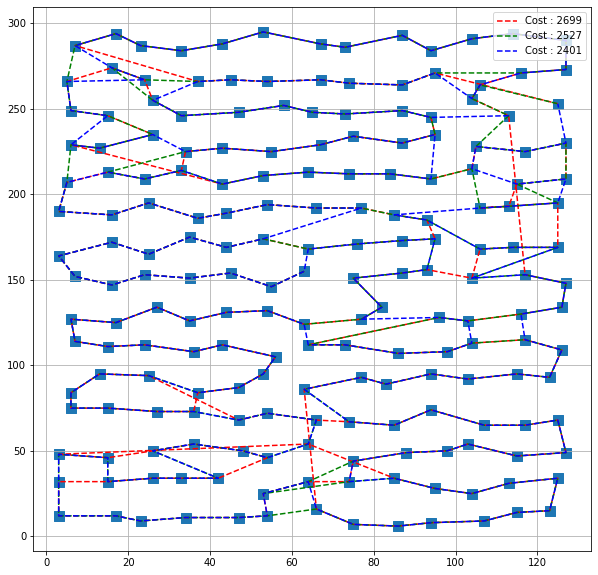

In [365]:
plot_points_and_path(points,[found_path,two_opt_optimized_path,three_opt_optimized_path])